In [1]:
import torch
import numpy as np
from preprocessing.data_pipeline import build_data_pipeline

from preprocessing.preprocess_ucr import UCRDatasetImporter
from pathlib import Path

from models.MaskGIT.sample import unconditional_sample, conditional_sample

# from evaluation.evaluation import Evaluation
from utils import get_root_dir, load_yaml_param_settings, save_model
from models.MaskGIT.maskgit import MaskGIT
import os
import tempfile
from evaluation.evaluation import Evaluation
import matplotlib.pyplot as plt


/home/erlendlokna/Documents/ntnu/Generative-SSL-VQVAE-modelling/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
config_dir = "configs/config.yaml"
config = load_yaml_param_settings(config_dir)
dataset_name = config["dataset"]["dataset_name"]

dataset_importer = UCRDatasetImporter(**config["dataset"])
batch_size = config["dataset"]["batch_sizes"]["stage2"]
train_data_loader, test_data_loader = [
    build_data_pipeline(batch_size, dataset_importer, config, kind)
    for kind in ["train", "test"]
]

input_length = train_data_loader.dataset.X.shape[-1]
n_classes = len(np.unique(train_data_loader.dataset.Y.flatten()))
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


self.X_train.shape: (500, 140)
self.X_test.shape: (4500, 140)
# unique labels (train): [0 1 2 3 4]
# unique labels (test): [0 1 2 3 4]


In [3]:
eval = Evaluation(dataset_name, device, config, batch_size=batch_size)

self.X_train.shape: (500, 140)
self.X_test.shape: (4500, 140)
# unique labels (train): [0 1 2 3 4]
# unique labels (test): [0 1 2 3 4]


In [4]:
n_samples = len(test_data_loader.dataset.X)
x_gen = eval.sample(n_samples, input_length, n_classes, 'unconditional')

1
/home/erlendlokna/Documents/ntnu/Generative-SSL-VQVAE-modelling/saved_models
barlow_twins_1_encoder-ECG5000.ckpt
encoder loaded
/home/erlendlokna/Documents/ntnu/Generative-SSL-VQVAE-modelling/saved_models
barlow_twins_1_decoder-ECG5000.ckpt
decoder loaded
/home/erlendlokna/Documents/ntnu/Generative-SSL-VQVAE-modelling/saved_models
barlow_twins_1_vq_model-ECG5000.ckpt
vq_model loaded
iter: 1/18
------
torch.Size([256, 40])
------
iter: 2/18
------
torch.Size([256, 40])
------
iter: 3/18
------
torch.Size([256, 40])
------
iter: 4/18
------
torch.Size([256, 40])
------
iter: 5/18
------
torch.Size([256, 40])
------
iter: 6/18
------
torch.Size([256, 40])
------
iter: 7/18
------
torch.Size([256, 40])
------
iter: 8/18
------
torch.Size([256, 40])
------
iter: 9/18
------
torch.Size([256, 40])
------
iter: 10/18
------
torch.Size([256, 40])
------
iter: 11/18
------
torch.Size([256, 40])
------
iter: 12/18
------
torch.Size([256, 40])
------
iter: 13/18
------
torch.Size([256, 40])
----

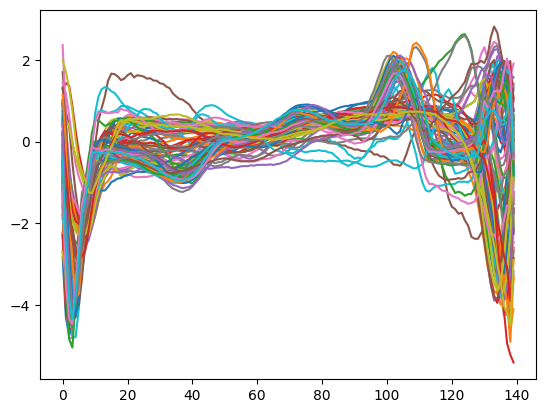

In [5]:
n_figs = 100

for i in np.random.choice(len(x_gen), n_figs): plt.plot(x_gen[i, 0, :])

In [6]:
z_test, z_gen = eval.compute_z(x_gen)

2.3077311420127913


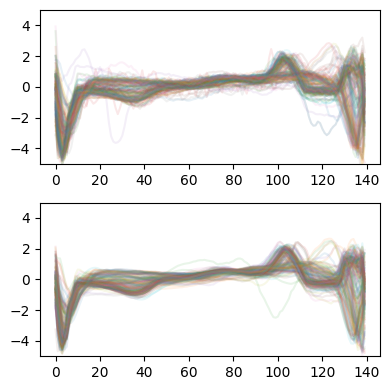

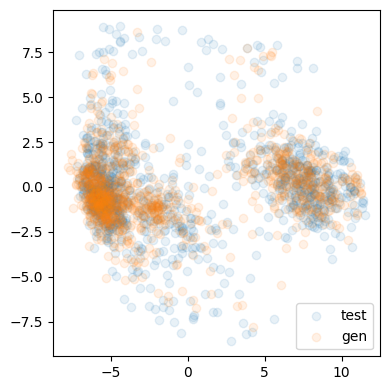

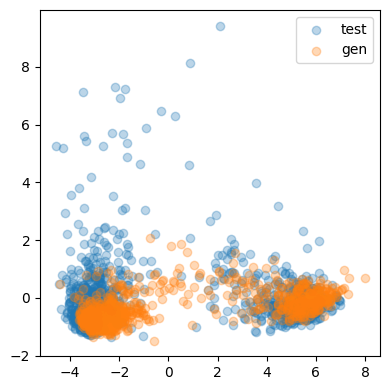

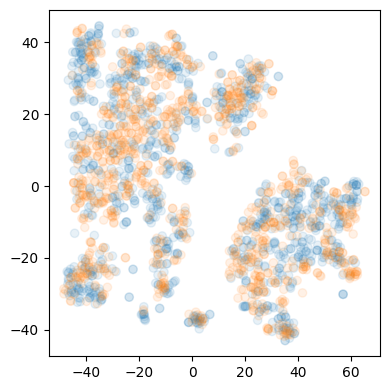

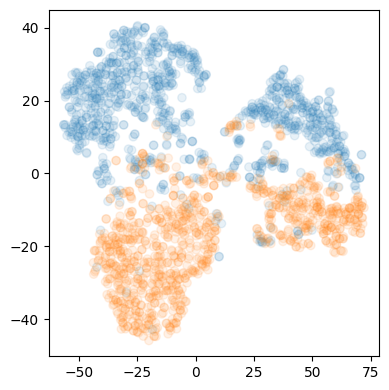

In [11]:
z_test, z_gen = eval.compute_z(x_gen)
fid, (z_test, z_gen) = eval.fid_score(z_test, z_gen)
IS_mean, IS_std = eval.inception_score(x_gen)
print("fid": fid)
print("IS_mean": IS_mean)
print("IS_std": IS_std)
#wandb.log({'FID': fid, 'IS_mean': IS_mean, 'IS_std': IS_std})

eval.visual_inspection(min(200, eval.X_test.shape[0]), x_gen, log=False)
eval.pca(min(1000, eval.X_test.shape[0]), x_gen, z_test, z_gen, log=False)
eval.tsne(min(1000, eval.X_test.shape[0]), x_gen, z_test, z_gen, log=False)

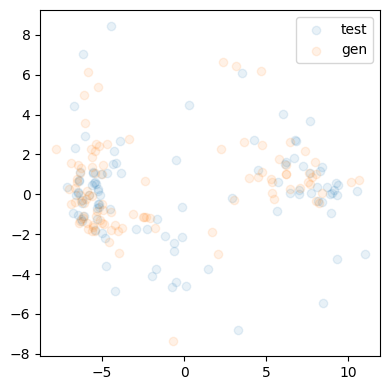

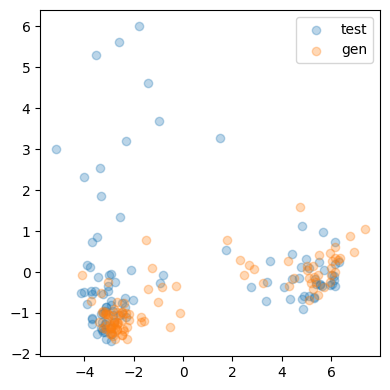

In [8]:
eval.pca(n_figs, x_gen, z_test, z_gen, log=False)